### Untuned PorousAI FinBERT Model

In [ ]:
senti_ProsusAI_fin_bert = BertForSequenceClassification.from_pretrained('ProsusAI/finbert', num_labels=3)
senti_ProsusAI_fin_tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

In [ ]:
senti_ProsusAI_fin_bert.config.id2label

{0: 'positive', 1: 'negative', 2: 'neutral'}

In [ ]:
neutral = list()
positive = list()
negative = list()
for i in range(len(test_set)):
  inputs = senti_ProsusAI_fin_tokenizer(test_set.iloc[i, 0], padding=True, truncation=True, max_length=512, return_tensors='pt') #tokenize text to be sent to model
  outputs = senti_ProsusAI_fin_bert(**inputs)
  predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
  positive.append(predictions[0][0].tolist())
  negative.append(predictions[0][1].tolist())
  neutral.append(predictions[0][2].tolist())

In [ ]:
df_array = np.array(test_set)
df_list = list(df_array[:, 0])
table = {'News_Headline':df_list, "Positive":positive, "Negative":negative, "Neutral":neutral}      
result_ProsusAI_fin_BERT = pd.DataFrame(table, columns=["News_Headline", "Positive", "Negative", "Neutral"])
result_ProsusAI_fin_BERT['Prediction'] = result_ProsusAI_fin_BERT[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)
result_ProsusAI_fin_BERT['label'] = test_set['label'].copy()
result_ProsusAI_fin_BERT

,News_Headline,Positive,Negative,Neutral,Prediction,label
0,"Of this , EUR 38.8 mn was net interest income .",0.031277,0.042233,0.926490,Neutral,Neutral
1,The government has instead proposed an exchang...,0.055886,0.011572,0.932541,Neutral,Neutral
2,"Nordea Pankki Suomi Oyj , according to previou...",0.563541,0.016723,0.419737,Positive,Neutral
3,Under the agreement GeoSentric will provide Gy...,0.480644,0.006842,0.512514,Neutral,Positive
4,Both operating profit and turnover for the six...,0.957293,0.022669,0.020038,Positive,Positive
...,...,...,...,...,...,...
917,"Finnish Suominen Flexible Packaging Ltd , owne...",0.012097,0.906946,0.080957,Negative,Negative
918,"Alma Media holds 70 % of this company , the re...",0.026444,0.017033,0.956523,Neutral,Neutral
919,Less than ten people will face pension agreeme...,0.013429,0.760617,0.225954,Negative,Neutral
920,"Purchase it for the 12MP snapper , if nothing ...",0.049946,0.022302,0.927752,Neutral,Neutral


              precision    recall  f1-score   support

    Negative       0.78      0.97      0.87       115
     Neutral       0.97      0.85      0.91       548
    Positive       0.82      0.93      0.87       259

    accuracy                           0.89       922
   macro avg       0.86      0.92      0.88       922
weighted avg       0.90      0.89      0.89       922



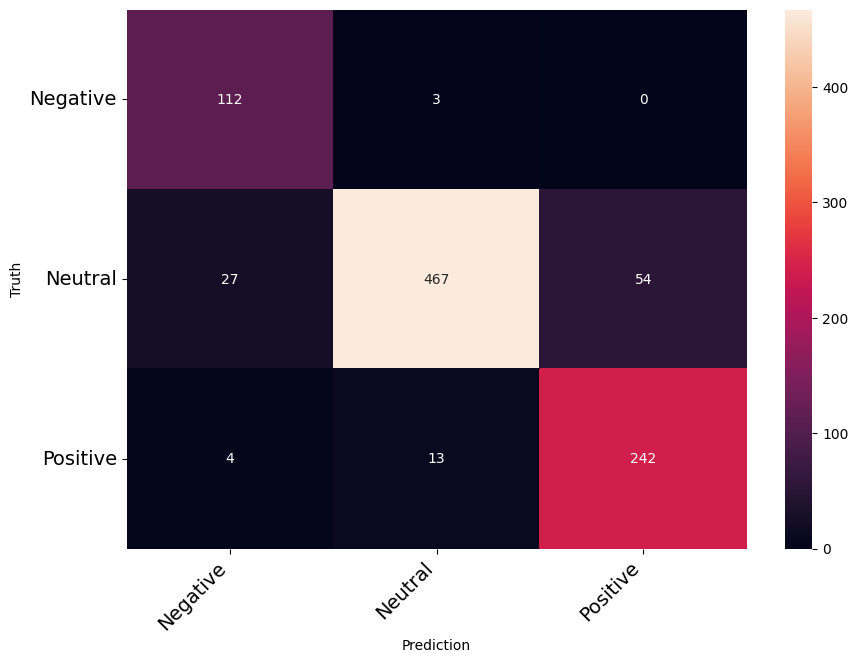

In [ ]:
print(classification_report(result_ProsusAI_fin_BERT['label'], result_ProsusAI_fin_BERT['Prediction']))
print_confusion_matrix(confusion_matrix(result_ProsusAI_fin_BERT['label'], result_ProsusAI_fin_BERT['Prediction']), ['Negative', 'Neutral', 'Positive'])

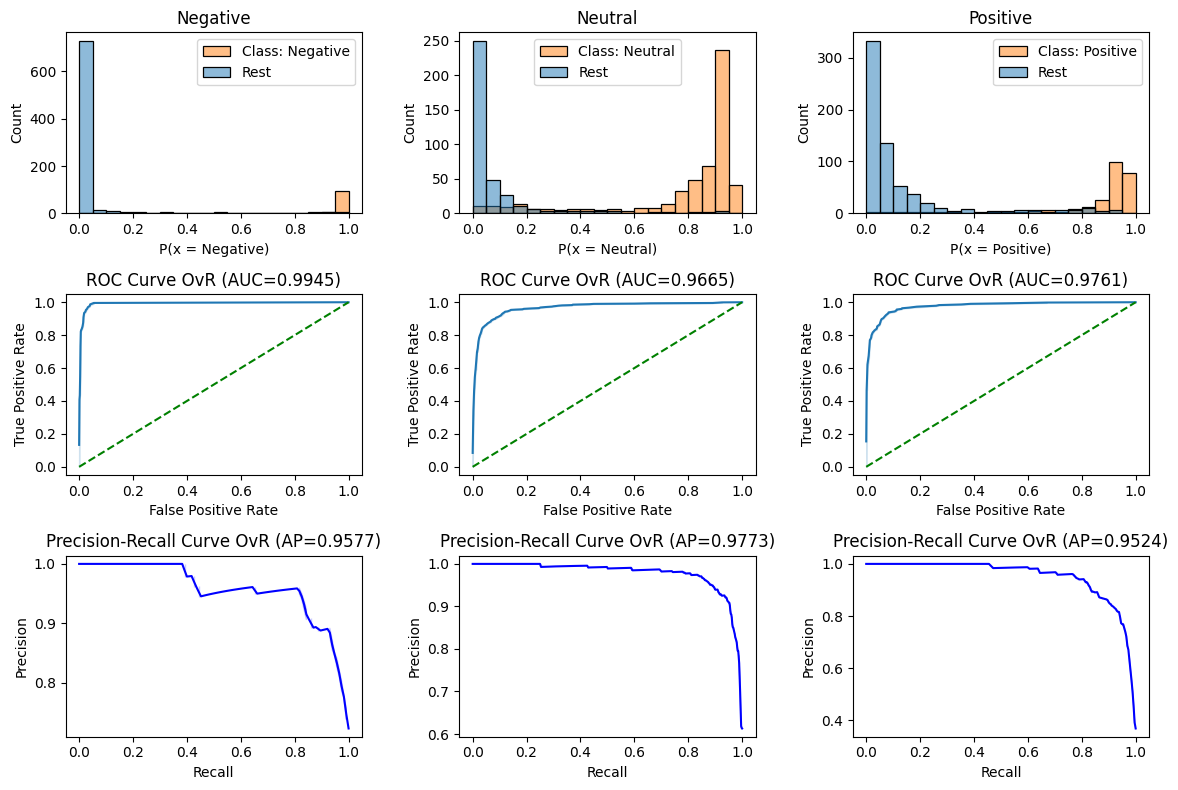

In [ ]:
plot_roc_pr_ovr(result_ProsusAI_fin_BERT)